In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
df_test = pd.read_csv("DailyDelhiClimateTest.csv")
df_test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [3]:
df_train = pd.read_csv("DailyDelhiClimateTrain.csv")
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
df = pd.concat([df_test,df_train], axis=0)
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [5]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1576.000000,1576.000000,1576.000000,1576.000000
mean,25.221918,60.445229,6.899262,1010.593178
std,7.345014,16.979994,4.510725,175.242704
min,6.000000,13.428571,0.000000,-3.041667
25%,18.500000,49.750000,3.700000,1001.875000
50%,27.166667,62.440476,6.363571,1009.055556
75%,31.142857,72.125000,9.262500,1015.200000
max,38.714286,100.000000,42.220000,7679.333333


array([[<AxesSubplot:title={'center':'meantemp'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'wind_speed'}>,
        <AxesSubplot:title={'center':'meanpressure'}>]], dtype=object)

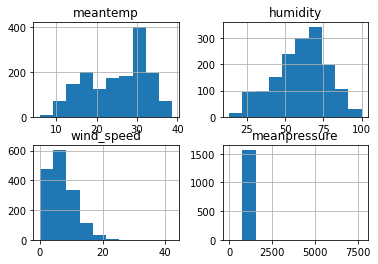

In [6]:
df.hist()

### Check for missing values

In [7]:
#check "meantemp" column for missing data
df["meantemp"].isnull().sum()
#no missing data

0

In [8]:
#check if all values in "meantemp" column are numeric
df["meantemp"].to_frame().applymap(np.isreal)

,meantemp
0,True
1,True
2,True
3,True
4,True
...,...
1457,True
1458,True
1459,True
1460,True


In [9]:
#check for any specific non-numeric values
for val in df["meantemp"]:
    if not str(val).isdigit():
        print(val)
#all values are numeric

15.91304347826087
18.5
17.11111111111111
18.7
18.38888888888889
19.318181818181817
14.708333333333336
15.68421052631579
14.571428571428573
12.111111111111109
11.0
11.789473684210524
13.235294117647056
13.2
16.434782608695652
14.65
11.722222222222221
13.041666666666664
14.61904761904762
15.26315789473684
15.391304347826088
18.44
18.11764705882353
18.347826086956523
21.0
16.178571428571427
16.5
14.863636363636365
15.666666666666664
16.444444444444443
16.125
15.25
17.09090909090909
15.636363636363635
18.7
18.63157894736842
16.88888888888889
15.125
15.7
15.375
14.666666666666664
15.625
16.25
16.333333333333332
16.875
17.571428571428573
20.25
21.3
21.125
22.363636363636363
23.375
21.83333333333333
19.125
18.625
19.125
19.0
18.75
19.875
23.33333333333333
24.461538461538463
23.75
20.5
19.125
19.75
20.0
22.625
21.545454545454547
20.785714285714285
19.9375
18.53333333333333
17.375
17.444444444444443
18.0
19.875
24.0
20.9
24.69230769230769
24.66666666666667
23.33333333333333
25.0
27.25
28.0
28.9

In [10]:
#check data type of "meantemp" column values
df["meantemp"].dtype

dtype('float64')

In [11]:
#check "humidity" column for missing data
df["humidity"].isnull().sum()
# no missing data

0

In [12]:
#check if all values in "humidity" column are numeric
df["humidity"].to_frame().applymap(np.isreal)

,humidity
0,True
1,True
2,True
3,True
4,True
...,...
1457,True
1458,True
1459,True
1460,True


In [13]:
#check for any specific non-numeric values
for val in df["humidity"]:
    if not str(val).isdigit():
        print(val)
#all values are numreic

85.8695652173913
77.22222222222223
81.8888888888889
70.05
74.94444444444444
79.31818181818181
95.83333333333331
83.52631578947368
80.80952380952381
71.94444444444444
72.1111111111111
74.57894736842105
67.05882352941177
74.28
72.56521739130434
78.45
84.44444444444444
78.33333333333333
75.14285714285714
66.47368421052633
70.8695652173913
76.24
76.0
68.1304347826087
69.96
91.64285714285714
77.04166666666667
82.77272727272727
81.77777777777777
77.55555555555556
76.0
78.625
66.54545454545455
78.18181818181819
77.6
77.63157894736842
69.66666666666667
63.75
68.4
68.375
71.77777777777777
64.0
70.375
67.0
65.5
67.71428571428571
56.75
64.4
70.75
66.0909090909091
60.125
69.41666666666667
57.125
42.875
40.375
50.42857142857143
59.0
58.375
51.66666666666666
47.92307692307693
54.25
42.5
43.125
41.25
42.444444444444436
41.5
52.72727272727273
69.07142857142857
67.75
60.4
56.625
49.33333333333334
56.33333333333334
54.75
49.2
59.7
46.30769230769231
52.27777777777778
54.66666666666666
49.0
45.0
49.75
37.

In [14]:
#check data type of "humidity" column values
df["humidity"].dtype

dtype('float64')

In [15]:
#check "wind_speed" column for missing data
df["wind_speed"].isnull().sum()
#no missing data

0

In [16]:
#check if all values for "wind_speed" column are numeric
df["wind_speed"].to_frame().applymap(np.isreal)

,wind_speed
0,True
1,True
2,True
3,True
4,True
...,...
1457,True
1458,True
1459,True
1460,True


In [17]:
#check for any specific non-numeric values
for val in df["wind_speed"]:
    if not str(val).isdigit():
        print(val)
#all values are numeric

2.743478260869565
2.8944444444444444
4.016666666666667
4.545
3.3000000000000003
8.681818181818182
10.041666666666664
1.95
6.542857142857143
9.361111111111107
9.77222222222222
6.626315789473684
6.435294117647059
5.276
3.6304347826086962
10.38
8.038888888888888
6.029166666666664
10.33809523809524
11.226315789473684
13.695652173913045
5.867999999999999
6.752941176470588
3.3913043478260865
8.755999999999998
8.467857142857143
14.358333333333333
9.690909090909091
10.294444444444443
4.322222222222221
4.625
5.1000000000000005
3.027272727272727
1.8545454545454545
9.82
8.099999999999998
9.044444444444443
7.637500000000001
4.08
7.875000000000003
9.066666666666666
3.95
1.625
6.377777777777778
6.9625
5.557142857142856
10.4375
9.279999999999998
6.25
6.0545454545454565
6.937499999999999
12.341666666666667
7.4125
14.35
16.6625
11.928571428571427
11.1125
5.1000000000000005
3.911111111111112
6.415384615384617
5.9300000000000015
7.4125
8.350000000000001
9.9625
9.666666666666664
6.025
10.263636363636364
8

In [18]:
#check data type of "wind_speed" column values
df["wind_speed"].dtype

dtype('float64')

In [19]:
#check "meanpressure" column for missing data
df["meanpressure"].isnull().sum()
#no missing data

0

In [20]:
#check if all values in "meanpressure" column are numeric
df["meanpressure"].to_frame().applymap(np.isreal)

,meanpressure
0,True
1,True
2,True
3,True
4,True
...,...
1457,True
1458,True
1459,True
1460,True


In [21]:
#check for any specific non-numeric values
for val in df["meanpressure"]:
    if not str(val).isdigit():
        print(val)
#all values are numeric

59.0
1018.2777777777777
1018.3333333333335
1015.7
1014.3333333333335
1011.7727272727273
1011.375
1015.55
1015.952380952381
1016.8888888888887
1016.7777777777777
1016.3684210526317
1017.529411764706
1018.84
1018.1304347826087
1017.15
1018.3888888888887
1021.9583333333335
1022.809523809524
1021.7894736842104
1020.4782608695652
1021.04
1019.8235294117646
1018.8695652173913
1018.4
1017.7857142857144
1018.125
1019.6363636363636
1017.3888888888887
1015.8333333333335
1015.5
1017.5
1018.9090909090908
1017.7272727272727
1014.4
1014.2105263157896
1016.0
1016.125
1015.6
1016.375
1015.6666666666665
1016.625
1019.625
1021.5555555555555
1021.375
1020.5714285714287
1017.625
1016.5
1016.25
1013.0
1005.375
1007.4166666666665
1012.25
1015.25
1016.125
1014.2857142857144
1012.375
1014.25
1013.1111111111113
1012.9230769230768
1012.15
1010.625
1010.0
1010.5
1010.3333333333335
1007.375
1008.9090909090908
1007.3571428571428
1006.875
1009.8
1014.75
1014.8888888888887
1016.5555555555555
1014.125
1011.1
1010.7
1

In [22]:
#check data type of "meanpressure" column values
df["meanpressure"].dtype

dtype('float64')

> There were no missing values in all four columns so there was no need for justification on dealing with missing data. 

### Check for outliers

<AxesSubplot:>

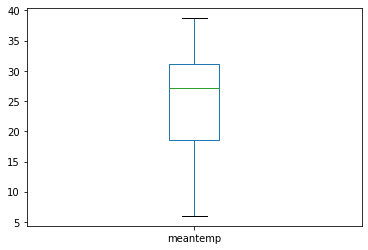

In [23]:
#examine "meantemp" box plot
df["meantemp"].plot.box()
#no outliers so there is no need to drop

<AxesSubplot:>

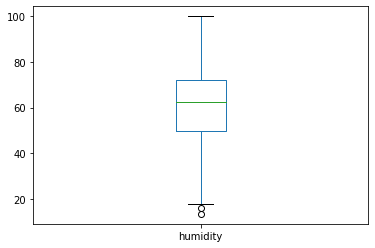

In [24]:
#examine "humidity" box plot
df["humidity"].plot.box()
#outliers present but not significant enough to drop

<AxesSubplot:>

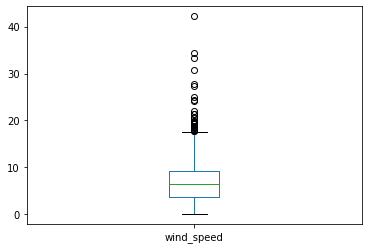

In [25]:
#examine "wind_speed" box plot
df["wind_speed"].plot.box()
#outliers present and significantly affects data = drop

In [26]:
#refer to resources about dropping outliers
#drop outliers for "wind_speed"
df["z_score"]=stats.zscore(df["wind_speed"])  #calculate z-score
print(df["z_score"])

0      -0.921604
1      -0.888125
2      -0.639257
3      -0.522091
4      -0.798188
          ...   
1457   -0.743229
1458   -0.199424
1459   -0.140287
1460    0.094414
1461   -1.530010
Name: z_score, Length: 1576, dtype: float64


In [27]:
df["z_score"].loc[df["z_score"].abs()<=3]  #anything with z-score above 3 is an outlier
#length dropped from 1576 to 1562 (dropped outliers)

0      -0.921604
1      -0.888125
2      -0.639257
3      -0.522091
4      -0.798188
          ...   
1457   -0.743229
1458   -0.199424
1459   -0.140287
1460    0.094414
1461   -1.530010
Name: z_score, Length: 1562, dtype: float64

<AxesSubplot:>

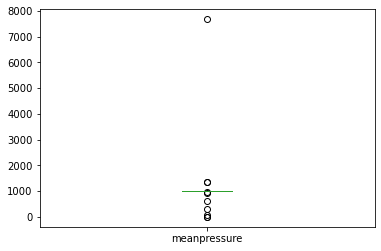

In [28]:
#examine "meanpressure" box plot
df["meanpressure"].plot.box()
#outliers present and significantly affects data = drop

In [29]:
#drop outliers for "meanpressure"
df["z_score"]=stats.zscore(df["meanpressure"])  #calculate z-score
print(df["z_score"])

0      -5.431868
1       0.043865
2       0.044182
3       0.029151
4       0.021349
          ...   
1457    0.028381
1458    0.036028
1459    0.041736
1460    0.031434
1461    0.030863
Name: z_score, Length: 1576, dtype: float64


In [30]:
df["z_score"].loc[df["z_score"].abs()<=3]  #anything with z-score above 3 is an outlier
#length dropped from 1576 to 1571 (dropped outliers)

1       0.043865
2       0.044182
3       0.029151
4       0.021349
5       0.006733
          ...   
1457    0.028381
1458    0.036028
1459    0.041736
1460    0.031434
1461    0.030863
Name: z_score, Length: 1571, dtype: float64

> Columns "meantemp" and "humidity" had no outliers and insignficant outliers, respectively. Therefore, there was no reason to drop anything from either column. However, both columns "wind_speed" and "meanpressure" had signficant outliers that would affect the data. Hence, there was reason to drop those outliers. I did so by computing the z-score of the respective columns and then locating any value with a z-score higher than 3 (which were the outliers). After dropping the outliers, the total length of each respective column decreased.

### Center, scale, and/or transform data (continuous data)

In [31]:
from sklearn import preprocessing as prep

<AxesSubplot:ylabel='Density'>

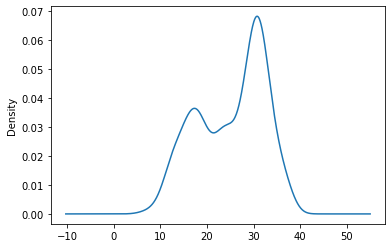

In [32]:
df["meantemp"].plot.density()  
#left skewed = center/scale/transform

<AxesSubplot:ylabel='Density'>

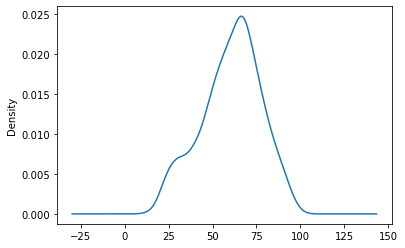

In [33]:
df["humidity"].plot.density()  
#normal distribution so there is no need to transform, only center and scale

<AxesSubplot:ylabel='Density'>

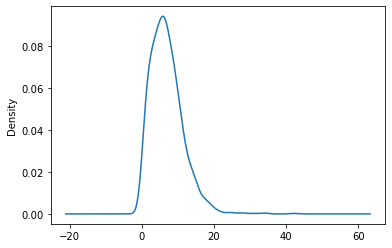

In [34]:
df["wind_speed"].plot.density()  
#right skewed = center/scale/transform

<AxesSubplot:ylabel='Density'>

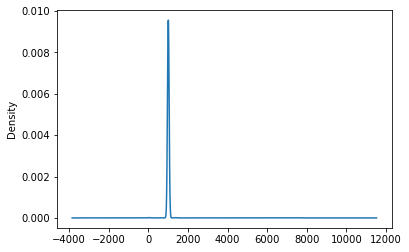

In [35]:
df["meanpressure"].plot.density()  
#right skewed = center/scale/transform

In [36]:
#center and scale all continuous data
df_cont = df[['meantemp','humidity','wind_speed','meanpressure']]
df_cont.head()

,meantemp,humidity,wind_speed,meanpressure
0,15.913043,85.869565,2.743478,59.000000
1,18.500000,77.222222,2.894444,1018.277778
2,17.111111,81.888889,4.016667,1018.333333
3,18.700000,70.050000,4.545000,1015.700000
4,18.388889,74.944444,3.300000,1014.333333


array([[<AxesSubplot:title={'center':'meantemp'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'wind_speed'}>,
        <AxesSubplot:title={'center':'meanpressure'}>]], dtype=object)

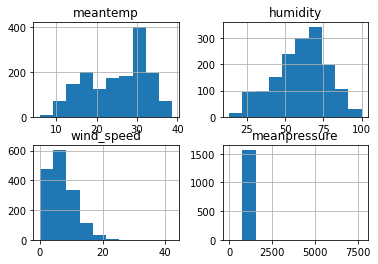

In [37]:
df_cont.hist()

In [38]:
scaled_data = prep.scale(df_cont)
scaled_climate_df = pd.DataFrame(scaled_data, 
                                   index=df_cont.index,
                                   columns=df_cont.columns)
scaled_climate_df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1.576000e+03,1.576000e+03,1.576000e+03,1.576000e+03
mean,-4.130931e-16,-3.835060e-16,-1.518808e-16,4.353738e-16
std,1.000317e+00,1.000317e+00,1.000317e+00,1.000317e+00
min,-2.617833e+00,-2.769823e+00,-1.530010e+00,-5.786013e+00
25%,-9.154579e-01,-6.300723e-01,-7.094819e-01,-4.976496e-02
50%,2.648553e-01,1.175431e-01,-1.187970e-01,-8.777031e-03
75%,8.063727e-01,6.880732e-01,5.240817e-01,2.629658e-02
max,1.837525e+00,2.330232e+00,7.832877e+00,3.806639e+01


array([[<AxesSubplot:title={'center':'meantemp'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'wind_speed'}>,
        <AxesSubplot:title={'center':'meanpressure'}>]], dtype=object)

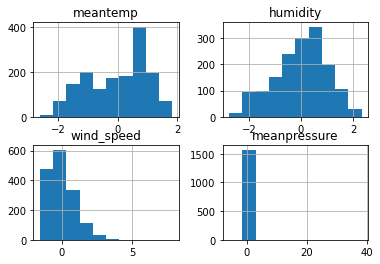

In [39]:
#double check centered and scaled distributions
scaled_climate_df.hist()

In [40]:
#transform "meantemp", "wind_speed", and "meanpressure" 
df_skew = df[['meantemp','wind_speed','meanpressure']]
df_skew.head()

,meantemp,wind_speed,meanpressure
0,15.913043,2.743478,59.000000
1,18.500000,2.894444,1018.277778
2,17.111111,4.016667,1018.333333
3,18.700000,4.545000,1015.700000
4,18.388889,3.300000,1014.333333


array([[<AxesSubplot:title={'center':'meantemp'}>,
        <AxesSubplot:title={'center':'wind_speed'}>],
       [<AxesSubplot:title={'center':'meanpressure'}>, <AxesSubplot:>]],
      dtype=object)

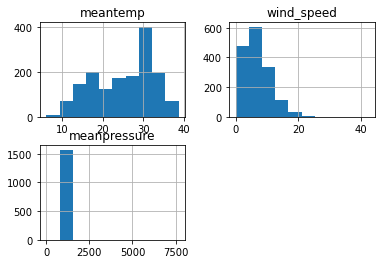

In [41]:
df_skew.hist()

array([[<AxesSubplot:title={'center':'meantemp'}>,
        <AxesSubplot:title={'center':'wind_speed'}>],
       [<AxesSubplot:title={'center':'meanpressure'}>, <AxesSubplot:>]],
      dtype=object)

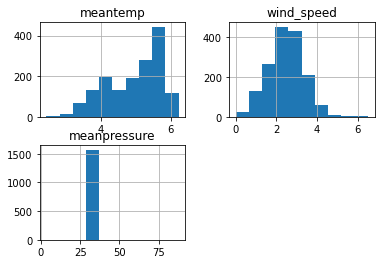

In [42]:
#apply square root transformation
sqrt_transformed_col = df_skew.apply(np.sqrt)  #sqrt of data points
sqrt_transformed_col.hist()  #plot histogram to check

array([[<AxesSubplot:title={'center':'meantemp'}>,
        <AxesSubplot:title={'center':'wind_speed'}>],
       [<AxesSubplot:title={'center':'meanpressure'}>, <AxesSubplot:>]],
      dtype=object)

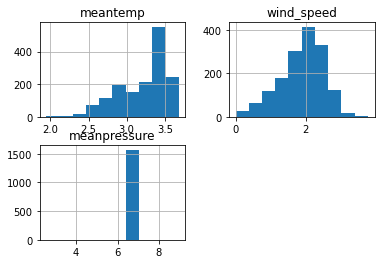

In [43]:
#apply log transformation
log_transformed_col = (df_skew+1).apply(np.log)  #log of data points
log_transformed_col.hist()  #plot histogram to check

#log transformation is better represented in this case, since it is closer to a normal distribution!

> Columns "meantemp", "wind_speed", and "meanpressure" were all skewed with large distributions so I decided to center, scale, and transform them with both the square root transformation approach as well as the log transformation approach. The results showed that the log transformation was better represented in this case, since it was closer to a normal distribution. On the other hand, I only scaled and centered "humidity" for a smaller distribution and better visualization since it was a normal distribution.

### Create and train a linear regression model that estimates the average mean temperature
ŷ = α + Bx
* ŷ - response variable (the value we are trying to predict)
* α - intercept
* B - regression coefficient
* x - predictor variable 

In [44]:
#check for any highly correlated columns 
df_cont.corr()
#"meantemp" and "humidity" are highest correlated since it is the closest to -1 or 1

,meantemp,humidity,wind_speed,meanpressure
meantemp,1.000000,-0.574849,0.288088,-0.034681
humidity,-0.574849,1.000000,-0.373602,-0.001672
wind_speed,0.288088,-0.373602,1.000000,-0.016949
meanpressure,-0.034681,-0.001672,-0.016949,1.000000


In [45]:
temp = df[['meantemp','humidity']]
temp.head()

,meantemp,humidity
0,15.913043,85.869565
1,18.500000,77.222222
2,17.111111,81.888889
3,18.700000,70.050000
4,18.388889,74.944444


In [46]:
X = df[['meantemp']]  #predictor variable
y = df[['humidity']]  #response varaible

In [47]:
#split data into training and test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=1)

In [48]:
#train model
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [49]:
#view coefficients of the model

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for meantemp is -1.308806000782389


In [50]:
#view intercepts of the model
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 93.447129329517


> The linear regression model: ŷ = 93.45 - 1.309x

### Calculate $R^{2}$ and RMSE scores

In [51]:
#calculate R^2 accuracy score
regression_model.score(X_test, y_test)

0.3405401433443055

In [52]:
#calculate SME score first
from sklearn.metrics import mean_squared_error
y_predict = regression_model.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse
#then calculate RMSE score
import math
math.sqrt(regression_model_mse)

13.693187370996906

> The linear regression model is ŷ = 93.45 - 1.309x with a 34% $R^{2}$ accuracy score and a 13.69 RMSE score. The 34% accuracy rate shows in our model, only 34% of the variability in Y can be explained using X. RMSE is a good measure of how accurately the model predicts the response. The lower the RMSE score, the more accurate it is. With our 13.69 RSME score, we can conclude that it may not be as accurate as we'd hope given the RSME score is fairly high and the $R^{2}$ accurate rate has a low percentage of 34%.

### Play with predictors

In [53]:
X_test.head()

,meantemp
1342,31.692308
239,30.142857
1373,28.833333
63,20.875000
153,35.600000


In [54]:
#try predicting "humidity" given "meantemp" for unknown day (id: 63)

new_data = [[20.875]]
regression_model.predict(new_data)

array([[66.12580406]])

In [55]:
#try changing value so that the data is unknown, untrained, and untested
#to our model and returns a new prediction based on the new value
new_data = [[56.342]]
regression_model.predict(new_data)

array([[19.70638163]])

> Adding predictors will help improve our model's accuracy based on an algorithm that the predictor can assume for every value that is being predicted.

### 3 new models with different sets of parameters
ŷ = α + Bx

### Mean temp model

In [56]:
temp = df[['meantemp','meantemp']]
temp.head()

,meantemp,meantemp
0,15.913043,15.913043
1,18.500000,18.500000
2,17.111111,17.111111
3,18.700000,18.700000
4,18.388889,18.388889


In [57]:
X = df[['meantemp']]  #predictor variable
y = df[['meantemp']]  #response varaible

In [58]:
#split data into training and test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=1)

In [59]:
#train model
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [60]:
#view coefficients of the model

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for meantemp is 0.9999999999999998


In [61]:
#view intercepts of the model
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 7.105427357601002e-15


> Mean temp model: ŷ = 7.105 - 0.999x

### Wind speed model

In [62]:
#wind_speed model
temp = df[['meantemp','wind_speed']]
temp.head()

,meantemp,wind_speed
0,15.913043,2.743478
1,18.500000,2.894444
2,17.111111,4.016667
3,18.700000,4.545000
4,18.388889,3.300000


In [63]:
X = df[['meantemp']]  #predictor variable
y = df[['wind_speed']]  #response varaible

In [64]:
#split data into training and test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=1)

In [65]:
#train model
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [66]:
#view coefficients of the model

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for meantemp is 0.16728198441042608


In [67]:
#view intercepts of the model
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 2.702494616231375


> Wind speed model: ŷ = 2.702 - 0.167x

### Mean pressure model

In [68]:
#meanpressure model
temp = df[['meantemp','meanpressure']]
temp.head()

,meantemp,meanpressure
0,15.913043,59.000000
1,18.500000,1018.277778
2,17.111111,1018.333333
3,18.700000,1015.700000
4,18.388889,1014.333333


In [69]:
X = df[['meantemp']]  #predictor variable
y = df[['meanpressure']]  #response varaible

In [70]:
#split data into training and test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=1)

In [71]:
#train model
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [72]:
#view coefficients of the model

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for meantemp is -0.7672327700335989


In [73]:
#view intercepts of the model
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1031.9227044709803


> Mean pressure model: ŷ = 1031.92 + 0.767x

### Best model: meantemp and meanpressure
* Mean temp model: ŷ = 7.105 - 0.999x (*strong* negative correlation)
* Wind speed model: ŷ = 2.702 - 0.167x (weak negative correlation)
* Mean pressure model: ŷ = 1031.92 + 0.767x (*strong* postive correlation)

The stronger the correlation is in a model, the better it is. Hence, my best models ended up being the "meantemp" and "meanpressure" models because they both had the strongest correlations (both positive anf negative) while "wind_speed" had the weakest. 

### Justification Summary
###### **specific explanations are located under their respective sections*

* There were no missing values in all four columns so there was no need for justification on dealing with missing data. 

* Columns "meantemp" and "humidity" had no outliers and insignficant outliers, respectively. Therefore, there was no reason to drop anything from either column. However, both columns "wind_speed" and "meanpressure" had signficant outliers that would affect the data. Hence, there was reason to drop those outliers. I did so by computing the z-score of the respective columns and then locating any value with a z-score higher than 3 (which were the outliers). After dropping the outliers, the total length of each respective column decreased.

* Columns "meantemp", "wind_speed", and "meanpressure" were all skewed with large distributions so I decided to center, scale, and transform them with both the square root transformation approach as well as the log transformation approach. The results showed that the log transformation was better represented in this case, since it was closer to a normal distribution. On the other hand, I only scaled and centered "humidity" for a smaller distribution and better visualization since it was a normal distribution.

* **There was no discrete data, therefore I did not need to do a dummy variable conversion. Although "date" is discrete, it is not a good predictor so there is no need to use it.**

* The linear regression model is ŷ = 93.45 - 1.309x with a 34% R^2 accuracy score and a 13.69 RMSE score. The 34% accuracy rate shows in our model, only 34% of the variability in Y can be explained using X. RMSE is a good measure of how accurately the model predicts the response. The lower the RMSE score, the more accurate it is. With our 13.69 RSME score, we can conclude that it may not be as accurate as we'd hope given the RSME score is fairly high and the R^2 accurate rate has a low percentage of 34%.

* Adding predictors will help improve our model's accuracy based on an algorithm that the predictor can assume for every value that is being predicted.

* The stronger the correlation is in a model, the better it is. Hence, my best models ended up being the "meantemp" and "meanpressure" models because they both had the strongest correlations (both positive anf negative) while "wind_speed" had the weakest. 
    * Mean temp model: ŷ = 7.105 - 0.999x (*strong* negative correlation)
    * Wind speed model: ŷ = 2.702 - 0.167x (weak negative correlation)
    * Mean pressure model: ŷ = 1031.92 + 0.767x (*strong* postive correlation)

### Resources
* How to remove outliers: https://kanoki.org/2020/04/23/how-to-remove-outliers-in-python/